In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

df = pd.read_csv("data/vente.csv")
df.head()

,Date,Produit,Catégorie,Quantité,Prix_Unitaire
0,2025-01-01,Café,Boissons,5,2.5
1,2025-01-01,Croissant,Viennoiserie,3,1.2
2,2025-01-02,Jus d'orange,Boissons,2,3.0
3,2025-01-03,Baguette,Boulangerie,10,0.9
4,2025-01-04,Sandwich,Snack,4,4.5


In [2]:
df.info

<bound method DataFrame.info of           Date       Produit     Catégorie  Quantité  Prix_Unitaire
0   2025-01-01          Café      Boissons         5            2.5
1   2025-01-01     Croissant  Viennoiserie         3            1.2
2   2025-01-02  Jus d'orange      Boissons         2            3.0
3   2025-01-03      Baguette   Boulangerie        10            0.9
4   2025-01-04      Sandwich         Snack         4            4.5
5   2025-01-05           Thé      Boissons         6            2.0
6   2025-01-06         Donut  Viennoiserie         8            1.5
7   2025-01-07        Salade         Snack         3            5.0
8   2025-01-08     Croissant  Viennoiserie         7            1.2
9   2025-01-09          Café      Boissons         4            2.5
10  2025-01-10      Baguette   Boulangerie        12            0.9
11  2025-01-11      Sandwich         Snack         5            4.5
12  2025-01-12  Jus d'orange      Boissons         3            3.0
13  2025-01-13  

le fichier contient 29 lignes et 

In [3]:
df.describe()

,Quantité,Prix_Unitaire
count,29.000000,29.000000
mean,5.448276,2.462069
std,2.653653,1.372020
min,2.000000,0.900000
25%,3.000000,1.200000
50%,5.000000,2.000000
75%,7.000000,3.000000
max,12.000000,5.000000


les colonnes numériques sont : "Quantité" et "Prix_Unitaire"

In [4]:
df.isnull().sum()

Date             0
Produit          0
Catégorie        0
Quantité         0
Prix_Unitaire    0
dtype: int64

il n'y a aucune colonne avec des valeurs nul ou manquantes

In [5]:
df.dtypes

Date              object
Produit           object
Catégorie         object
Quantité           int64
Prix_Unitaire    float64
dtype: object

il y a 3 types de données : float64 (à virgule), int64 (entier) et object (variant)

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

Transformation de "Date" au format Datetime

In [7]:
df['Montant'] = df['Quantité'] * df['Prix_Unitaire']

In [8]:
df.head()

,Date,Produit,Catégorie,Quantité,Prix_Unitaire,Montant
0,2025-01-01,Café,Boissons,5,2.5,12.5
1,2025-01-01,Croissant,Viennoiserie,3,1.2,3.6
2,2025-01-02,Jus d'orange,Boissons,2,3.0,6.0
3,2025-01-03,Baguette,Boulangerie,10,0.9,9.0
4,2025-01-04,Sandwich,Snack,4,4.5,18.0


In [9]:
df.isnull().sum()

Date             0
Produit          0
Catégorie        0
Quantité         0
Prix_Unitaire    0
Montant          0
dtype: int64

In [10]:
df['Mois'] = df['Date'].dt.month

In [11]:
df['Jour'] = df['Date'].dt.day

In [12]:
df['Jour_Semaine'] = df['Date'].dt.day_name()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           29 non-null     datetime64[ns]
 1   Produit        29 non-null     object        
 2   Catégorie      29 non-null     object        
 3   Quantité       29 non-null     int64         
 4   Prix_Unitaire  29 non-null     float64       
 5   Montant        29 non-null     float64       
 6   Mois           29 non-null     int32         
 7   Jour           29 non-null     int32         
 8   Jour_Semaine   29 non-null     object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(3)
memory usage: 1.9+ KB


In [14]:
df.head()

,Date,Produit,Catégorie,Quantité,Prix_Unitaire,Montant,Mois,Jour,Jour_Semaine
0,2025-01-01,Café,Boissons,5,2.5,12.5,1,1,Wednesday
1,2025-01-01,Croissant,Viennoiserie,3,1.2,3.6,1,1,Wednesday
2,2025-01-02,Jus d'orange,Boissons,2,3.0,6.0,1,2,Thursday
3,2025-01-03,Baguette,Boulangerie,10,0.9,9.0,1,3,Friday
4,2025-01-04,Sandwich,Snack,4,4.5,18.0,1,4,Saturday


In [15]:
df.columns

Index(['Date', 'Produit', 'Catégorie', 'Quantité', 'Prix_Unitaire', 'Montant',
       'Mois', 'Jour', 'Jour_Semaine'],
      dtype='object')

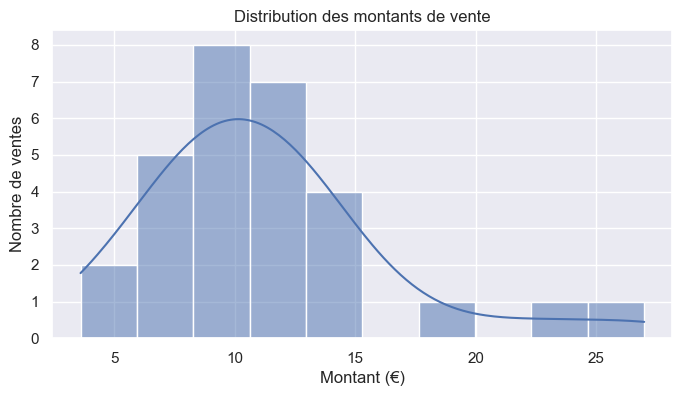

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Montant'], bins=10, kde=True)
plt.title("Distribution des montants de vente")
plt.xlabel("Montant (€)")
plt.ylabel("Nombre de ventes")
plt.show()

Graphique représentant la distribution des ventes selon leur tranche de prix.

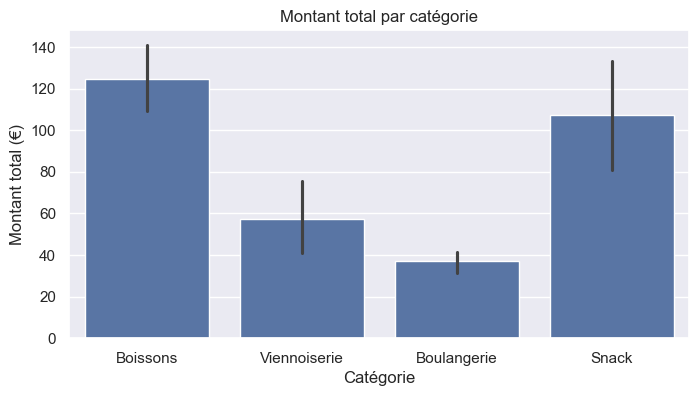

In [17]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Catégorie', y='Montant', data=df, estimator=sum)
plt.title("Montant total par catégorie")
plt.ylabel("Montant total (€)")
plt.show()

Graphique représentant la somme des ventes par cétégories de produits

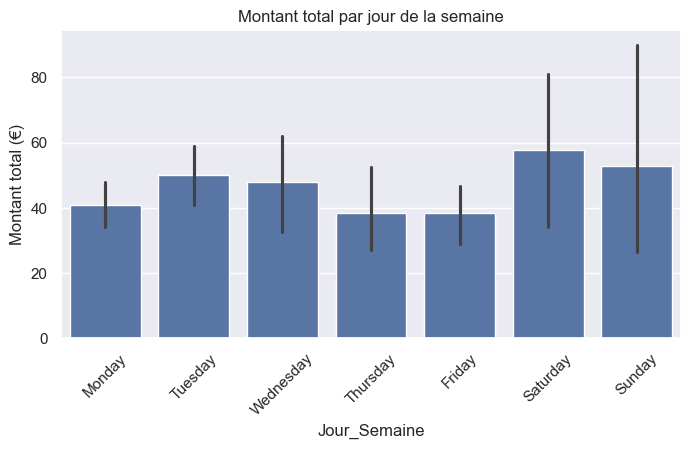

In [19]:
plt.figure(figsize=(8, 4))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='Jour_Semaine', y='Montant', data=df, estimator=sum, order=order)
plt.title("Montant total par jour de la semaine")
plt.ylabel("Montant total (€)")
plt.xticks(rotation=45)
plt.show()


Graphique représentant la somme total des ventes par jours de la semaine

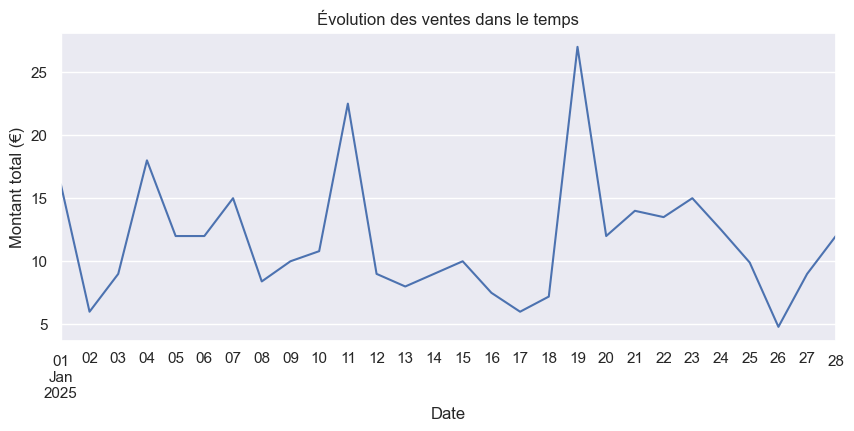

In [23]:
df_journalier = df.groupby('Date')['Montant'].sum()

plt.figure(figsize=(10, 4))
df_journalier.plot()
plt.title("Évolution des ventes dans le temps")
plt.xlabel("Date")
plt.ylabel("Montant total (€)")
plt.grid(True)
plt.show()

Graphique représentant l'évolution de la somme des ventes sur le mois de janvier